In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math

from functools import reduce
import operator

from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from  sklearn.linear_model import LogisticRegressionCV

# Regularized linear regression

### Importing the test & train sets.

In [2]:
train = pd.read_csv("train_housing.csv")
test = pd.read_csv("test_housing.csv")

### Exploring the data

In [26]:
print('The training set contains %.0f observations and %.0f features.' %(train.shape[0],train.shape[1]))
print('The test set contains %.0f observations and %.0f features.' %(test.shape[0],test.shape[1]))

The training set contains 1460 observations and 81 features.
The test set contains 1459 observations and 80 features.


### The categorical features are

In [27]:
train.loc[:, train.dtypes == object].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

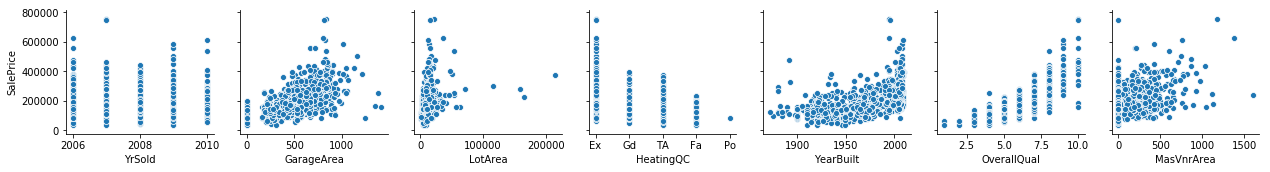

In [0]:
import seaborn as sns

sns.pairplot(data = train, y_vars = ['SalePrice'], x_vars = ['YrSold','GarageArea','LotArea','HeatingQC','YearBuilt','OverallQual','MasVnrArea'])

### Splitting the training set

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
missing = train.isnull().sum()
drop_vars = missing.index[np.where(missing > 500)].tolist()

In [0]:
train_clean = train.drop(drop_vars, axis = 1)
train_clean = train_clean.drop('Id', axis = 1)
train_clean = train_clean.dropna()
train_clean = pd.get_dummies(train_clean, columns = train_clean.loc[:, train_clean.dtypes == object].columns.to_list(), drop_first = True)

X = train_clean.drop('SalePrice', axis = 1)
y = train_clean['SalePrice']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### OLS using sklearn

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [0]:
import matplotlib.pyplot as plt 

df1 = df.head(25)
df1.plot(kind='bar',figsize=(13,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))  

Mean Absolute Error: 25383.789571552985
Mean Squared Error: 5683279670.555466
Root Mean Squared Error: 75387.52994067033
R^2 Score: 0.11061722700138554


### kNN using CV

In [0]:
train_clean = train.drop(drop_vars, axis = 1)
train_clean = train_clean.drop('Id', axis = 1)
train_clean = train_clean.dropna()
not_for_scale = train_clean.loc[:, train_clean.dtypes == object].columns.to_list() + ['SalePrice']
train_clean = pd.get_dummies(train_clean, columns = train_clean.loc[:, train_clean.dtypes == object].columns.to_list(), drop_first = True)

X = train_clean.drop('SalePrice', axis = 1)
y = train_clean['SalePrice']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X[X.columns.difference(not_for_scale)])

X_train = scaler.fit_transform(X_train[X_train.columns.difference(not_for_scale)])

X_test = scaler.fit_transform(X_test[X_test.columns.difference(not_for_scale)])

### Run this cell in order to add quadratic features - everything else should work as expected.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

X = poly.fit_transform(X)

X_train = poly.fit_transform(X_train)

X_test = poly.fit_transform(X_test)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

neighbors = list(range(1, 11, 1))

cv_scores = []


for k in neighbors:
    print(k)
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10)
    cv_scores.append(scores.mean())
    
   

In [0]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors = np.argmax(np.array(cv_scores))+1)
knn.fit(X_train,y_train)

In [0]:
knn.score(X_test, y_test)
y_pred = knn.predict(X_test)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))  

### Lasso and Ridge Regression using CV

In [0]:
from sklearn.linear_model import RidgeCV

In [0]:
modelCV_ridge = RidgeCV(alphas = [0.1,10,20,30,50,60,70,80,90,100] , cv = 10)
modelCV_ridge.fit(X_train,y_train)
modelCV_ridge.alpha_ 
modelCV_ridge.score(X_train,y_train)

In [0]:
y_pred = modelCV_ridge.predict(X_test)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))  

In [0]:
from sklearn.linear_model import LassoCV

modelCV_lasso = LassoCV(n_alphas = 30, tol = 0.01, cv = 10)
modelCV_lasso.fit(X_train,y_train)
modelCV_lasso.alpha_  
modelCV_lasso.score(X_train,y_train)

0.985824983671042

In [0]:
y_pred = modelCV_lasso.predict(X_test)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))  

Mean Absolute Error: 21068.860108828954
Mean Squared Error: 1958074381.2881663
Root Mean Squared Error: 44250.13425164003
R^2 Score: 0.6935787566481997


In [0]:
indices_lasso = [i for i, e in enumerate(modelCV_lasso.coef_) if e != 0]
train_clean.columns[indices_lasso]

### Backward stepwise (linear) regression with 10-fold cross validation

In [0]:
from sklearn.feature_selection import RFECV

In [0]:
regressor = LinearRegression()

selector = RFECV(regressor, step = 1, cv = 10)
selector = selector.fit(X_train, y_train)
selector.score(X_train,y_train)

0.7527680669963905

In [0]:
y_pred = selector.predict(X_test)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))  

Mean Absolute Error: 31370.70728801271
Mean Squared Error: 2408928154.145354
Root Mean Squared Error: 49080.832859124894
R^2 Score: 0.6230241469924299


In [0]:
indices_backward = [i for i, x in enumerate(selector.support_) if x]
train_clean.columns[indices_backward]

Index(['Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Exterior1st_CBlock',
       'KitchenQual_TA'],
      dtype='object')

### Forward stepwise (linear) regression with 10-fold cross validation

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

regressor = LinearRegression()

sfs = SFS(regressor,
          k_features = 'parsimonious',
          forward = True, 
          floating = False, 
          cv=10)


sfs = sfs.fit(X_train, y_train)

In [0]:
sfs.k_score_

In [0]:
len(train_clean.columns[list(sfs.k_feature_idx_)].intersection(train_clean.columns[indices_lasso]))

In [0]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

In [0]:
regressor.fit(X_train_sfs, y_train)
y_pred = regressor.predict(X_test_sfs)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 23458.06239964995
Mean Squared Error: 1458797190.3372707
Root Mean Squared Error: 38194.203622241825
R^2 Score: 0.7717112009977959


### Kaggle predicition

In [0]:
missing = train.isnull().sum()
drop_vars = missing.index[np.where(missing > 500)].tolist()


train_clean = train.drop(drop_vars, axis = 1)
train_clean = train_clean.drop('Id', axis = 1)
train_clean = train_clean.dropna()
train_clean = pd.get_dummies(train_clean, columns = train_clean.loc[:, train_clean.dtypes == object].columns.to_list(), drop_first = True)


test_clean = test.drop(drop_vars, axis = 1)
test_clean = test_clean.drop('Id', axis = 1)
test_clean = test_clean.fillna(method = 'ffill')
test_clean = pd.get_dummies(test_clean, columns = test_clean.loc[:, test_clean.dtypes == object].columns.to_list(), drop_first = True)


In [0]:
drop_vars_v2 = train_clean.columns.difference(test_clean.columns)
train_clean = train_clean.drop(drop_vars_v2, axis = 1)


In [0]:
drop_vars_v3 = test_clean.columns.difference(train_clean.columns)
test_clean = test_clean.drop(drop_vars_v3, axis = 1)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

not_for_scale_train = train_clean.loc[:, train_clean.dtypes == object].columns.to_list()

not_for_scale_test = test_clean.loc[:, test_clean.dtypes == object].columns.to_list()

train_clean = scaler.fit_transform(train_clean[train_clean.columns.difference(not_for_scale_train)])

test_clean = scaler.fit_transform(test_clean[test_clean.columns.difference(not_for_scale_test)])



In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

test_clean = poly.fit_transform(test_clean)

train_clean = poly.fit_transform(train_clean)

In [0]:
from sklearn.linear_model import Ridge

best_model = Ridge(alpha = modelCV_ridge.alpha_).fit(train_clean,y)

y_pred = best_model.predict(test_clean)

In [49]:
#held-out validation accuracy (using RMSE from fitting RidgeCV to X_train)
print(37676/np.mean(y_test))

0.19601679183348653
